In [1]:
import os
from importlib.resources import files

import numpy as np
import torch
%matplotlib widget
import matplotlib
import matplotlib.pyplot as plt

from learn_embedding.approximators import *
from learn_embedding.covariances import *
from learn_embedding.kernels import SquaredExp
from learn_embedding.embedding import Embedding
from learn_embedding.dynamics import FirstGeometry
from learn_embedding.utils import *

## Load Dataset

In [2]:
dataset = "Khamesh"
data_path = files('learn_embedding').joinpath(os.path.join('data/lasahandwriting', '{}.mat'.format(dataset)))
data = LasaHandwriting(data_path)
train_x, train_y, test_x, test_y = data.load().process().dataset(target="velocity", split=0.6, visualize=False)
dim = train_y.shape[1]

## Torch Configuration

In [3]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
train_x = torch.from_numpy(train_x).float().to(device).requires_grad_(True)
train_y = torch.from_numpy(train_y).float().to(device)
test_x = torch.from_numpy(test_x).float().to(device).requires_grad_(True)
test_y = torch.from_numpy(test_y).float().to(device)

## Create Model

In [4]:
torch.manual_seed(1337)
# approximator = KernelExpansion(train_x)
# approximator = KernelMachine(dim, 1000, 1, length=0.4)
approximator = FeedForward(dim, [32,32,32], 1)

embedding = Embedding(approximator)

stiffness = SPD(dim)

attractor = train_x[-1, :].detach()

model = FirstGeometry(embedding, attractor, stiffness).to(device)
# model = TorchHelpel.load(model,)

## Train

In [5]:
trainer = Trainer(model, train_x, train_y)
trainer.optimizer = torch.optim.Adam(model.parameters(), lr=1e-2, weight_decay=1e-5)
# trainer.loss = torch.nn.MSELoss()
trainer.loss = torch.nn.SmoothL1Loss()
trainer.options(normalize=False, shuffle=True, print_loss=True,epochs=1000)
trainer.train()
TorchHelper.save(model, '../outputs/' + dataset + '_1')

EPOCH:  0 ITER:  0 LOSS:  37.332828521728516
EPOCH:  1 ITER:  0 LOSS:  36.808074951171875
EPOCH:  2 ITER:  0 LOSS:  36.28814697265625
EPOCH:  3 ITER:  0 LOSS:  35.770748138427734
EPOCH:  4 ITER:  0 LOSS:  35.25029373168945
EPOCH:  5 ITER:  0 LOSS:  34.727291107177734
EPOCH:  6 ITER:  0 LOSS:  34.20561981201172
EPOCH:  7 ITER:  0 LOSS:  33.68928527832031
EPOCH:  8 ITER:  0 LOSS:  33.182552337646484
EPOCH:  9 ITER:  0 LOSS:  32.68912887573242
EPOCH:  10 ITER:  0 LOSS:  32.20795440673828
EPOCH:  11 ITER:  0 LOSS:  31.736148834228516
EPOCH:  12 ITER:  0 LOSS:  31.27347183227539
EPOCH:  13 ITER:  0 LOSS:  30.82021713256836
EPOCH:  14 ITER:  0 LOSS:  30.377002716064453
EPOCH:  15 ITER:  0 LOSS:  29.94350242614746
EPOCH:  16 ITER:  0 LOSS:  29.52108383178711
EPOCH:  17 ITER:  0 LOSS:  29.105064392089844
EPOCH:  18 ITER:  0 LOSS:  28.696998596191406
EPOCH:  19 ITER:  0 LOSS:  28.2911434173584
EPOCH:  20 ITER:  0 LOSS:  27.893535614013672
EPOCH:  21 ITER:  0 LOSS:  27.494096755981445
EPOCH:  22

EPOCH:  184 ITER:  0 LOSS:  5.1965413093566895
EPOCH:  185 ITER:  0 LOSS:  5.1756911277771
EPOCH:  186 ITER:  0 LOSS:  5.1690592765808105
EPOCH:  187 ITER:  0 LOSS:  5.167586326599121
EPOCH:  188 ITER:  0 LOSS:  5.155539512634277
EPOCH:  189 ITER:  0 LOSS:  5.201283931732178
EPOCH:  190 ITER:  0 LOSS:  5.354379653930664
EPOCH:  191 ITER:  0 LOSS:  5.708763122558594
EPOCH:  192 ITER:  0 LOSS:  6.247718811035156
EPOCH:  193 ITER:  0 LOSS:  6.707422733306885
EPOCH:  194 ITER:  0 LOSS:  8.607101440429688
EPOCH:  195 ITER:  0 LOSS:  6.158731937408447
EPOCH:  196 ITER:  0 LOSS:  6.522149085998535
EPOCH:  197 ITER:  0 LOSS:  6.225277900695801
EPOCH:  198 ITER:  0 LOSS:  7.581572532653809
EPOCH:  199 ITER:  0 LOSS:  6.335266590118408
EPOCH:  200 ITER:  0 LOSS:  7.285869598388672
EPOCH:  201 ITER:  0 LOSS:  7.382371425628662
EPOCH:  202 ITER:  0 LOSS:  6.952579498291016
EPOCH:  203 ITER:  0 LOSS:  6.641055583953857
EPOCH:  204 ITER:  0 LOSS:  6.160332202911377
EPOCH:  205 ITER:  0 LOSS:  5.9209

EPOCH:  369 ITER:  0 LOSS:  4.645626544952393
EPOCH:  370 ITER:  0 LOSS:  4.7073283195495605
EPOCH:  371 ITER:  0 LOSS:  4.499717712402344
EPOCH:  372 ITER:  0 LOSS:  4.388481616973877
EPOCH:  373 ITER:  0 LOSS:  4.549893856048584
EPOCH:  374 ITER:  0 LOSS:  4.642092227935791
EPOCH:  375 ITER:  0 LOSS:  4.352081298828125
EPOCH:  376 ITER:  0 LOSS:  4.2986931800842285
EPOCH:  377 ITER:  0 LOSS:  4.398965358734131
EPOCH:  378 ITER:  0 LOSS:  4.40034294128418
EPOCH:  379 ITER:  0 LOSS:  4.201826095581055
EPOCH:  380 ITER:  0 LOSS:  4.219672679901123
EPOCH:  381 ITER:  0 LOSS:  4.284162521362305
EPOCH:  382 ITER:  0 LOSS:  4.234006404876709
EPOCH:  383 ITER:  0 LOSS:  4.120169639587402
EPOCH:  384 ITER:  0 LOSS:  4.120131015777588
EPOCH:  385 ITER:  0 LOSS:  4.093162536621094
EPOCH:  386 ITER:  0 LOSS:  4.083506107330322
EPOCH:  387 ITER:  0 LOSS:  4.127971649169922
EPOCH:  388 ITER:  0 LOSS:  4.015548229217529
EPOCH:  389 ITER:  0 LOSS:  4.076253414154053
EPOCH:  390 ITER:  0 LOSS:  4.025

EPOCH:  551 ITER:  0 LOSS:  3.788527488708496
EPOCH:  552 ITER:  0 LOSS:  3.6333179473876953
EPOCH:  553 ITER:  0 LOSS:  3.5784964561462402
EPOCH:  554 ITER:  0 LOSS:  3.6812174320220947
EPOCH:  555 ITER:  0 LOSS:  3.653988838195801
EPOCH:  556 ITER:  0 LOSS:  3.6115574836730957
EPOCH:  557 ITER:  0 LOSS:  3.627927303314209
EPOCH:  558 ITER:  0 LOSS:  3.484124183654785
EPOCH:  559 ITER:  0 LOSS:  3.700792074203491
EPOCH:  560 ITER:  0 LOSS:  3.938170909881592
EPOCH:  561 ITER:  0 LOSS:  3.6375350952148438
EPOCH:  562 ITER:  0 LOSS:  3.813894748687744
EPOCH:  563 ITER:  0 LOSS:  3.427109718322754
EPOCH:  564 ITER:  0 LOSS:  3.4552767276763916
EPOCH:  565 ITER:  0 LOSS:  3.4802846908569336
EPOCH:  566 ITER:  0 LOSS:  3.34474515914917
EPOCH:  567 ITER:  0 LOSS:  3.6491572856903076
EPOCH:  568 ITER:  0 LOSS:  3.5554251670837402
EPOCH:  569 ITER:  0 LOSS:  3.499476909637451
EPOCH:  570 ITER:  0 LOSS:  3.5306406021118164
EPOCH:  571 ITER:  0 LOSS:  4.005624771118164
EPOCH:  572 ITER:  0 LOSS

EPOCH:  734 ITER:  0 LOSS:  4.04852294921875
EPOCH:  735 ITER:  0 LOSS:  3.775472402572632
EPOCH:  736 ITER:  0 LOSS:  3.788818359375
EPOCH:  737 ITER:  0 LOSS:  4.025242805480957
EPOCH:  738 ITER:  0 LOSS:  3.948493480682373
EPOCH:  739 ITER:  0 LOSS:  3.812931537628174
EPOCH:  740 ITER:  0 LOSS:  3.6809639930725098
EPOCH:  741 ITER:  0 LOSS:  3.6359589099884033
EPOCH:  742 ITER:  0 LOSS:  3.653630256652832
EPOCH:  743 ITER:  0 LOSS:  3.579599618911743
EPOCH:  744 ITER:  0 LOSS:  3.5391221046447754
EPOCH:  745 ITER:  0 LOSS:  3.623931884765625
EPOCH:  746 ITER:  0 LOSS:  3.6566755771636963
EPOCH:  747 ITER:  0 LOSS:  3.5851945877075195
EPOCH:  748 ITER:  0 LOSS:  3.5817832946777344
EPOCH:  749 ITER:  0 LOSS:  3.685609817504883
EPOCH:  750 ITER:  0 LOSS:  3.4421775341033936
EPOCH:  751 ITER:  0 LOSS:  3.5793795585632324
EPOCH:  752 ITER:  0 LOSS:  3.511101007461548
EPOCH:  753 ITER:  0 LOSS:  3.4567081928253174
EPOCH:  754 ITER:  0 LOSS:  3.6306910514831543
EPOCH:  755 ITER:  0 LOSS:  

EPOCH:  915 ITER:  0 LOSS:  3.366286277770996
EPOCH:  916 ITER:  0 LOSS:  3.2422006130218506
EPOCH:  917 ITER:  0 LOSS:  3.384155035018921
EPOCH:  918 ITER:  0 LOSS:  3.260120391845703
EPOCH:  919 ITER:  0 LOSS:  3.343107223510742
EPOCH:  920 ITER:  0 LOSS:  3.24958872795105
EPOCH:  921 ITER:  0 LOSS:  3.2138068675994873
EPOCH:  922 ITER:  0 LOSS:  3.3884027004241943
EPOCH:  923 ITER:  0 LOSS:  3.9219002723693848
EPOCH:  924 ITER:  0 LOSS:  3.6730237007141113
EPOCH:  925 ITER:  0 LOSS:  3.727248430252075
EPOCH:  926 ITER:  0 LOSS:  3.443725347518921
EPOCH:  927 ITER:  0 LOSS:  3.642040967941284
EPOCH:  928 ITER:  0 LOSS:  3.5049068927764893
EPOCH:  929 ITER:  0 LOSS:  4.228291034698486
EPOCH:  930 ITER:  0 LOSS:  4.604696273803711
EPOCH:  931 ITER:  0 LOSS:  4.831516742706299
EPOCH:  932 ITER:  0 LOSS:  4.6312055587768555
EPOCH:  933 ITER:  0 LOSS:  4.6652302742004395
EPOCH:  934 ITER:  0 LOSS:  4.800507545471191
EPOCH:  935 ITER:  0 LOSS:  4.960312366485596
EPOCH:  936 ITER:  0 LOSS: 

## Test

In [6]:
resolution = 100
std = train_x.detach().std(axis=0)
min_ax = train_x.detach().min(axis=0)[0] - std/2
max_ax = train_x.detach().max(axis=0)[0] + std/2
y, x = torch.meshgrid(torch.linspace(min_ax[1], max_ax[1], resolution), torch.linspace(min_ax[0], max_ax[0], resolution))
grid_x = torch.stack((torch.ravel(x), torch.ravel(y)), dim=1).to(device).requires_grad_(True)
grid_r = torch.stack((torch.ravel(x[10::10,10::10]), torch.ravel(y[10::10,10::10])), dim=1).to(device).requires_grad_(True)

/home/bernardo/.local/lib/python3.10/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


### Potential

(-43.4147834777832, 5.24525785446167)

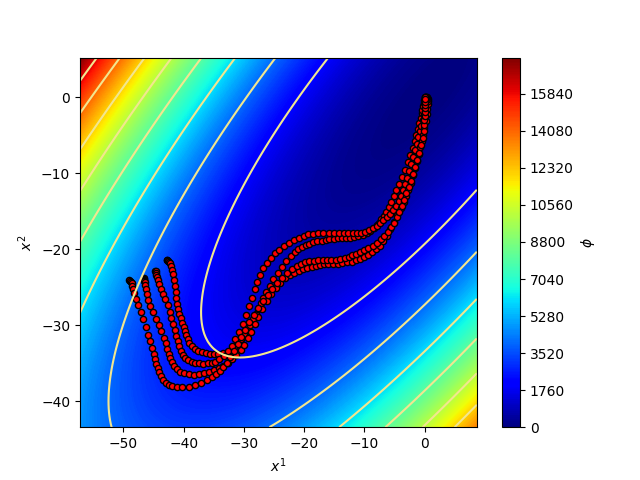

In [7]:
potential = model.potential(grid_x).reshape(resolution, -1).cpu().detach().numpy()
norm = matplotlib.colors.Normalize(vmin=potential.min(), vmax=potential.max())
colors = plt.cm.jet(norm(potential))
mappable = plt.cm.ScalarMappable(cmap=plt.cm.jet, norm=norm)

fig = plt.figure()
ax = fig.add_subplot(111)
im = ax.contourf(x, y, potential, 500, cmap="jet")
ax.contour(x, y, potential, 10, cmap=None, colors='#f2e68f')
ax.scatter(train_x.cpu().detach()[::10, 0], train_x.cpu().detach()[::10, 1], s=20, edgecolors='k', c='red')
ax.set_xlabel('$x^1$')
ax.set_ylabel('$x^2$')
fig.colorbar(im, ax=ax, label=r"$\phi$")
# ax.axis("equal")
ax.set_xlim([min_ax[0].cpu(), max_ax[0].cpu()])
ax.set_ylim([min_ax[1].cpu(), max_ax[1].cpu()])

### Vector Field & Streamlines

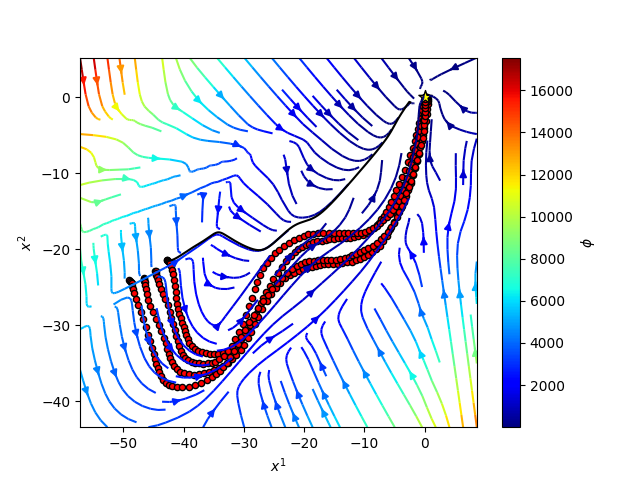

In [8]:
obstacle_radius = 0.1 # 0.05 , 0.1
obstacle = torch.tensor([[-0.4,-0.4]])
# obstacle = Obstacles.square(center=torch.tensor([-30,20]), a=20, b=20, res=10)
# obstacle = Obstacles.semi_circle(radius=0.2, center=torch.tensor([-0.4,   -0.4]), rot=torch.tensor(torch.pi/4), res=50)
decay = 5e-1
lengthscale = np.sqrt(-0.5*obstacle_radius**2/np.log(decay))
phi = KernelDeformation(obstacle.to(device), weights = 10.0*torch.ones(obstacle.shape[0]).to(device), kernel=SquaredExp(l=lengthscale)).to(device)
# embedding.local_deformation = phi

field = model(grid_x)
x_field = field[:, 0].reshape(resolution, -1).cpu().detach().numpy()
y_field = field[:, 1].reshape(resolution, -1).cpu().detach().numpy()

x0 = TorchHelper.grid_uniform(center=train_x[0,:].detach(), length=0.03, samples=1).to(device).requires_grad_(True)
streamlines = Integrator.first_order(dynamics=model,x0=x0,T=20, dt=0.01).cpu().detach().numpy()

fig = plt.figure()
ax = fig.add_subplot(111)
ax.streamplot(x.numpy(), y.numpy(), x_field, y_field, color=potential, cmap="jet")
for i in range(streamlines.shape[1]):
    ax.plot(streamlines[:, i, 0], streamlines[:, i, 1], color='k')
if hasattr(embedding, 'local_deformation'):
    for i in range(obstacle.shape[0]):
        circ = plt.Circle((obstacle[i, 0], obstacle[i, 1]), obstacle_radius,
                            color='k', fill='grey', alpha=0.5)
        ax.add_patch(circ)
ax.scatter(train_x.cpu().detach()[::10, 0], train_x.cpu().detach()[::10, 1], s=20, edgecolors='k', c='red')
ax.scatter(train_x.cpu().detach()[-1, 0], train_x.cpu().detach()[-1, 1], s=100, edgecolors='k', c='yellow', marker="*")
ax.set_xlabel('$x^1$')
ax.set_ylabel('$x^2$')
fig.colorbar(mappable,  ax=ax, label=r"$\phi$")

### Embedding

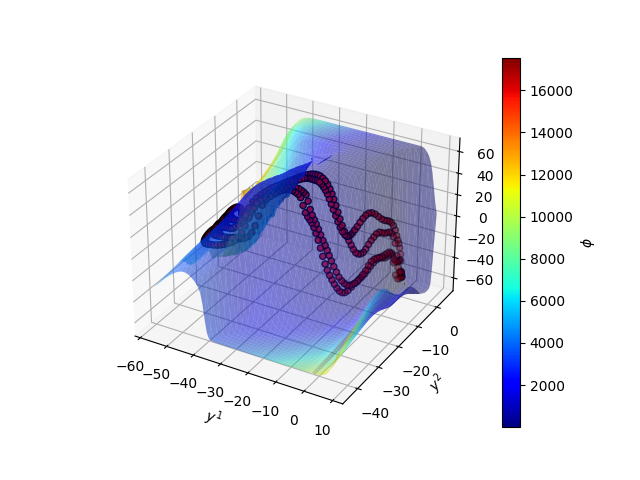

In [9]:
grid_embedding = embedding(grid_x)
x_embedding = grid_embedding[:, 0].reshape(resolution, -1).cpu().detach().numpy()
y_embedding = grid_embedding[:, 1].reshape(resolution, -1).cpu().detach().numpy()
z_embedding = grid_embedding[:, 2].reshape(resolution, -1).cpu().detach().numpy()
train_embedding = embedding(train_x).cpu().detach().numpy()

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
im = ax.plot_surface(x_embedding, y_embedding, z_embedding,facecolors=colors, antialiased=True, linewidth=0, alpha=0.5)
ax.scatter(train_embedding[::10, 0], train_embedding[::10, 1], train_embedding[::10, 2], s=20, edgecolors='k', c='red')
ax.set_xlabel('$y^1$')
ax.set_ylabel('$y^2$')
ax.set_zlabel('$y^3$')
fig.colorbar(mappable, ax=ax, label=r"$\phi$")

### Metric

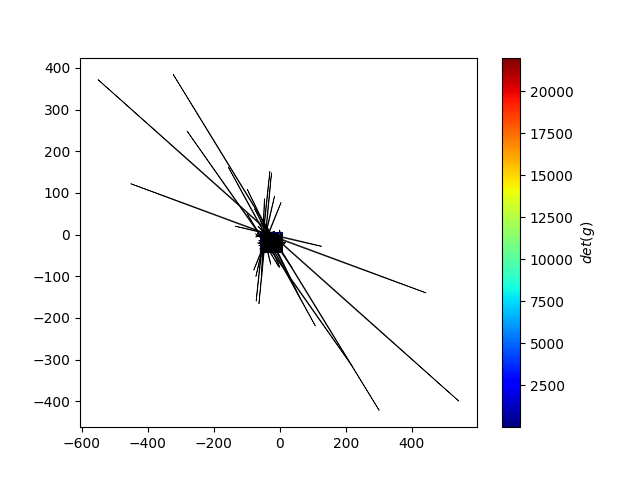

In [10]:
metric = model.embedding.pullmetric(grid_embedding, model.embedding.jacobian(grid_x, grid_embedding))
det_metric = metric.det().reshape(resolution, -1).detach().cpu().numpy()

red_embedding = embedding(grid_r)
metric_r = embedding.pullmetric(red_embedding, embedding.jacobian(grid_r, red_embedding))
evals,evecs = torch.linalg.eigh(metric_r)

theta = torch.linspace(0, 2*torch.pi, steps=50).to(device)
ellipses = torch.stack((evals[:, 0].unsqueeze(-1)*theta.cos(), evals[:, 1].unsqueeze(-1)*theta.sin()), dim=2)
ellipses = torch.bmm(evecs, ellipses.permute(0, 2, 1)).permute(0, 2, 1).detach().cpu()
ellipses_x = x[10::10,10::10].ravel().unsqueeze(-1) + ellipses[:, :, 0]
ellipses_y = y[10::10,10::10].ravel().unsqueeze(-1) + ellipses[:, :, 1]

norm = matplotlib.colors.Normalize(vmin=det_metric.min(), vmax=det_metric.max())
colors = plt.cm.jet(norm(det_metric))
mappable = plt.cm.ScalarMappable(cmap=plt.cm.jet, norm=norm)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.contourf(x, y, det_metric, 500, cmap="jet")
ax.scatter(x[10::10,10::10,], y[10::10,10::10], color="k", s=1)

for i in range(ellipses.shape[0]):
    ax.plot(ellipses_x[i,:], ellipses_y[i,:], color="k", linewidth=0.5)

fig.colorbar(mappable,  ax=ax, label=r"$det(g)$")

### Trajectory Metric Deformation

Text(0.5, 1.0, 'Sampled Trajectory with Metric Ellipses')

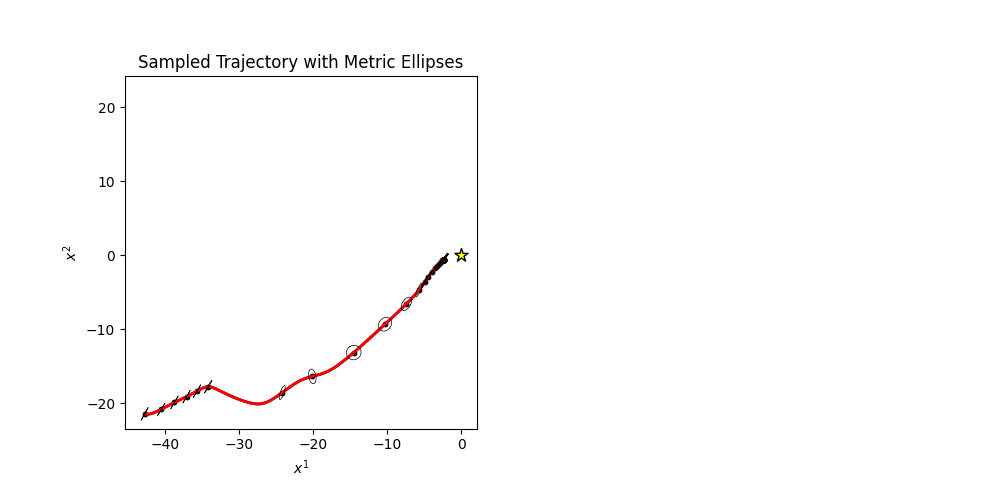

In [11]:
step = 40
eval_scale = 1
x_sampled = torch.from_numpy(streamlines[:, 0, :dim]).float().to(device).requires_grad_(True)
v_sampled = torch.from_numpy(streamlines[:, 0, dim:]).float().to(device).requires_grad_(True)
sampled_embedding = embedding(x_sampled)

metric_sampled = model.embedding.pullmetric(sampled_embedding, model.embedding.jacobian(x_sampled, sampled_embedding))
metric_evals,metric_evecs = torch.linalg.eigh(metric_sampled.inverse())
metric_ellipses = torch.stack((metric_evals[:, 0].unsqueeze(-1)*theta.cos(), metric_evals[:, 1].unsqueeze(-1)*theta.sin()), dim=2)
metric_ellipses = torch.bmm(metric_evecs, metric_ellipses.permute(0, 2, 1)).permute(0, 2, 1).detach().cpu()/eval_scale

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(121)
ax.plot(x_sampled[:, 0].detach().cpu(), x_sampled[:, 1].detach().cpu(), color='k', linewidth='2')
ax.plot(streamlines[:, 0, 0], streamlines[:, 0, 1], color='r', linewidth='2')
ax.scatter(x_sampled[::step, 0].detach().cpu(), x_sampled[::step, 1].detach().cpu(), color="k", s=10)
for i in range(0, metric_ellipses.shape[0], step):
    ax.plot(x_sampled[i, 0].detach().cpu() + metric_ellipses[i, :, 0],
            x_sampled[i, 1].detach().cpu() + metric_ellipses[i, :, 1], color="k", linewidth=0.5)
ax.scatter(attractor[0].cpu(), attractor[1].cpu(), s=100, edgecolors='k', c='yellow', marker="*")
if hasattr(embedding, 'local_deformation'):
    for i in range(obstacle.shape[0]):
        circ = plt.Circle((obstacle[i, 0], obstacle[i, 1]), obstacle_radius,
                            color='k', fill='grey', alpha=0.5)
        ax.add_patch(circ)
ax.axis('square')
# ax.set_xlim([min_ax[0].cpu(), max_ax[0].cpu()])
# ax.set_ylim([min_ax[1].cpu(), max_ax[1].cpu()])
ax.set_xlabel('$x^1$')
ax.set_ylabel('$x^2$')
ax.set_title('Sampled Trajectory with Metric Ellipses')